In [ ]:
!git clone https://github.com/atieh-ameri/Virtual_Tryon_HRVITON.git

Cloning into 'Virtual_Tryon_HRVITON'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 49 (delta 14), reused 29 (delta 2), pack-reused 0
Receiving objects: 100% (49/49), 5.20 MiB | 20.96 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
import os
root = os.getcwd()
folder = os.path.join(root, 'Virtual_Tryon_HRVITON')
os.chdir(folder)
%pwd

'/content/Virtual_Tryon_HRVITON/Virtual_Tryon_HRVITON'

In [ ]:
!pip install gdown
!pip install torchgeometry

In [ ]:
import gdown
import os
import shutil
import os
from PIL import Image
import IPython
from IPython.display import display, Image
import torchgeometry

In [ ]:
###import the checkpoints

downloadlink = 'https://drive.google.com/uc?id=1usPW3vTpWmUZfw1kjOSO4Rc7KG6IdYvH'
output_dest = 'HD_viton_data_chk.zip'

gdown.download(downloadlink,output_dest, quiet = False )

Downloading...
From (original): https://drive.google.com/uc?id=1usPW3vTpWmUZfw1kjOSO4Rc7KG6IdYvH
From (redirected): https://drive.google.com/uc?id=1usPW3vTpWmUZfw1kjOSO4Rc7KG6IdYvH&confirm=t&uuid=00ab51fc-21ad-46a2-978b-fe9b1fa5774a
To: /content/Virtual_Tryon_HRVITON/Virtual_Tryon_HRVITON/HD_viton_data_chk.zip
100%|██████████| 575M/575M [00:07<00:00, 77.4MB/s]


'HD_viton_data_chk.zip'

In [ ]:
!unzip HD_viton_data_chk.zip

Archive:  HD_viton_data_chk.zip
  inflating: VITON-HD/datasets/test_pairs.txt  
  inflating: VITON-HD/datasets/test.zip  
  inflating: VITON-HD/checkpoints/gmm_final.pth  
  inflating: VITON-HD/checkpoints/seg_final.pth  
  inflating: VITON-HD/checkpoints/alias_final.pth  


# Moving the checkpoints

In [ ]:
# Destination directory where files will be moved
source_dir  = os.path.join(root, 'Virtual_Tryon_HRVITON', 'VITON-HD', 'checkpoints')


destpath  = os.path.join(root, 'Virtual_Tryon_HRVITON', 'checkpoints')

# Traverse through the directory structure
for dirpath, dirnames, filenames in os.walk(source_dir):
    for file in filenames:
        file_direpath = os.path.join(source_dir, file)
        file_destpath = os.path.join(destpath, file)

        if file_direpath.endswith('.pth'):
            shutil.copy(file_direpath, file_destpath)

# Moving the dataset

In [ ]:
source_dir  = os.path.join(root, 'Virtual_Tryon_HRVITON', 'VITON-HD', 'datasets')
destpath = os.path.join(root, 'Virtual_Tryon_HRVITON', 'datasets')


# Traverse through the directory structure
for dirpath, dirnames, filenames in os.walk(source_dir):
    for file in filenames:
        file_direpath = os.path.join(dirpath, file)
        file_destpath = os.path.join(destpath, file)

        if file_direpath.endswith('.txt') or file_direpath.endswith('.zip'):
            shutil.copy(file_direpath, file_destpath)


In [ ]:
%cd datasets
!unzip test.zip
%cd ..
%pwd


/content/Virtual_Tryon_HRVITON/Virtual_Tryon_HRVITON/datasets
Archive:  test.zip
   creating: test/
   creating: test/cloth/
  inflating: test/cloth/02783_00.jpg  
  inflating: test/cloth/07429_00.jpg  
  inflating: test/cloth/11028_00.jpg  
  inflating: test/cloth/11351_00.jpg  
  inflating: test/cloth/01430_00.jpg  
  inflating: test/cloth/03751_00.jpg  
  inflating: test/cloth/06802_00.jpg  
  inflating: test/cloth/08348_00.jpg  
  inflating: test/cloth/09933_00.jpg  
  inflating: test/cloth/06429_00.jpg  
  inflating: test/cloth/11791_00.jpg  
  inflating: test/cloth/01260_00.jpg  
   creating: test/cloth-mask/
  inflating: test/cloth-mask/02783_00.jpg  
  inflating: test/cloth-mask/07429_00.jpg  
  inflating: test/cloth-mask/11028_00.jpg  
  inflating: test/cloth-mask/11351_00.jpg  
  inflating: test/cloth-mask/01430_00.jpg  
  inflating: test/cloth-mask/03751_00.jpg  
  inflating: test/cloth-mask/06802_00.jpg  
  inflating: test/cloth-mask/08348_00.jpg  
  inflating: test/cloth-m

'/content/Virtual_Tryon_HRVITON/Virtual_Tryon_HRVITON'

In [ ]:

# Function to create a dictionary of images from a folder
def create_image_dictionary(folder_path, num):
    image_dict = {}
    counter =0


    for filename in os.listdir(folder_path):

      filepath = os.path.join(folder_path, filename)
      if os.path.isfile(filepath):
          try:
              name = filename[:5]
              image_dict[name] = filepath
          except Exception as e:
              print(f"Skipping {filename}: {e}")

          sliced_dict = dict(list(image_dict.items())[:num])
    return sliced_dict


# Function to display images and their labels with reduced size
def display_images(image_paths, width, height):
    for label, path in image_paths.items():
        display(Image(filename=path, width=width, height=height))
        print("Label:", label[:5])
        print()



# Select the cloths

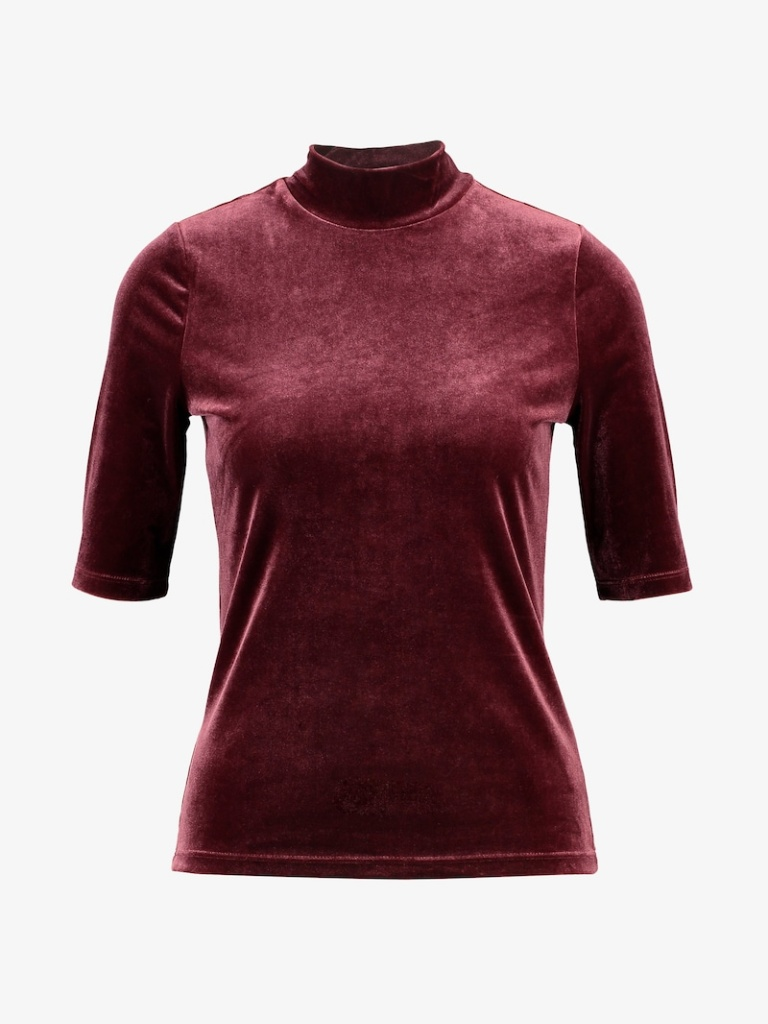

Label: 11028



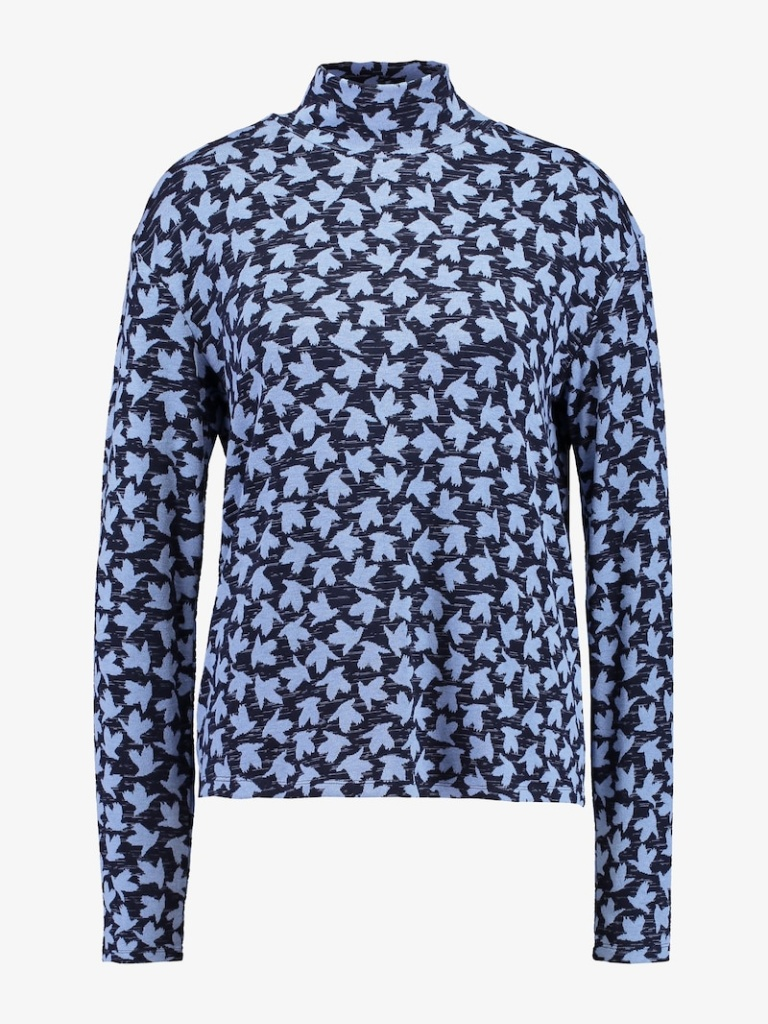

Label: 02783



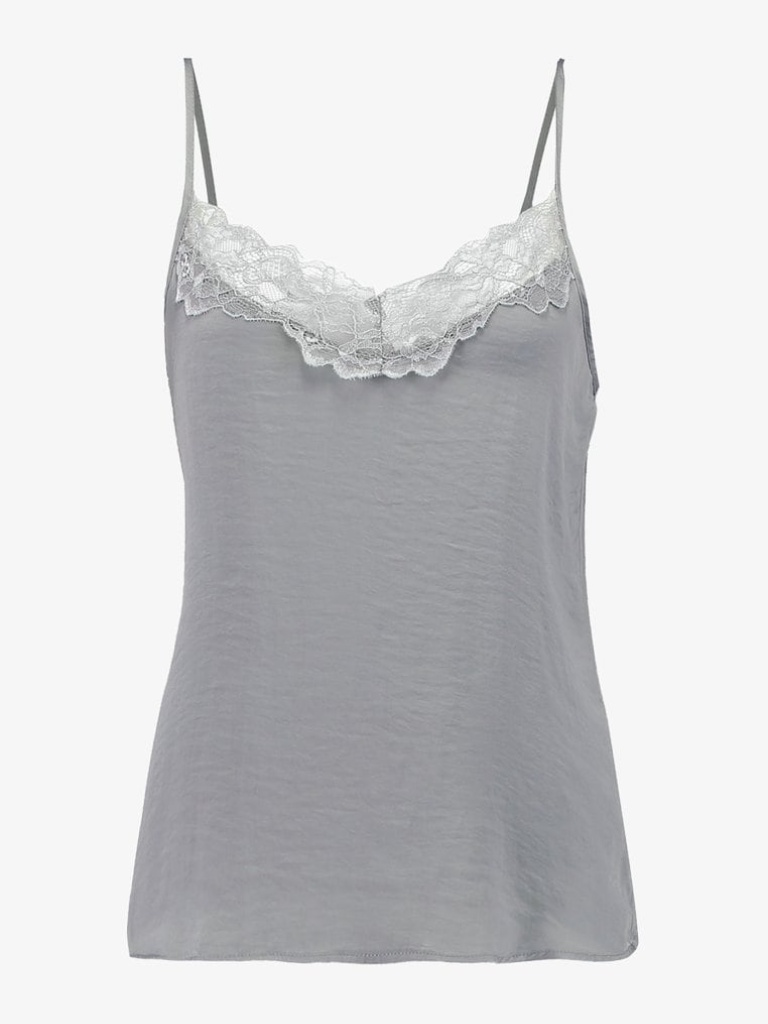

Label: 09933

Please select one image by typing its label (or press Enter for default): 09933
You selected: 09933


In [ ]:
### Select the cloth

## folder that contains cloth images
path = '/content/Virtual_Tryon_HRVITON/datasets/test/cloth'
num = 3

# Create the image dictionary
cloth_dict = create_image_dictionary(path, num)

# Display the images to the user
display_images(cloth_dict, 192, 256)

# Ask the user to select one
user_choice_cloth = input("Please select one image by typing its label (or press Enter for default): ")

# Validate the user's input
if user_choice_cloth.strip() == '':
    print("No input detected. Defaulting to '09933'.")
    selected_cloth_path = '09933'  # Default choice
elif user_choice_cloth in cloth_dict:
    print("You selected:", user_choice_cloth)
    selected_cloth_path = user_choice_cloth
else:
    print("Invalid choice.")




#Select the Model


In [ ]:
### Select the cloth


## folder that cintaun cloth
path= '/content/Virtual_Tryon_HRVITON/datasets/test/image'
num = 3

# Create the image dictionary
model_dict = create_image_dictionary(path, num)



# Ask the user to select one
user_choice = input("Please select one image by typing its label (or press Enter for default): ")

# Validate the user's input
if user_choice.strip() == '':
    print("No input detected. Defaulting to '07445'.")
    selected_model_path = '07445'  # Default choice
elif user_choice in cloth_dict:
    print("You selected:", user_choice)
    selected_model_path = user_choice
else:
    print("Invalid choice.")




Please select one image by typing its label (or press Enter for default): 
No input detected. Defaulting to '07445'.


In [ ]:
### give the info to model
%cd datasets
if os.path.exists ("test_pairs.txt"):
  os.remove ("test_pairs.txt")

# Open a file in write mode
with open("test_pairs.txt", "w") as file:
    # Write some text to the file
    file.write("{}_00.jpg {}_00.jpg".format(  selected_model_path,selected_cloth_path))
%cd ..

/content/Virtual_Tryon_HRVITON/Virtual_Tryon_HRVITON/datasets
/content/Virtual_Tryon_HRVITON/Virtual_Tryon_HRVITON


In [ ]:
### the result will be saved in the result folder
!python test.py --name [Atieh_result]

Namespace(name='[Atieh_result]', batch_size=1, workers=1, load_height=1024, load_width=768, shuffle=False, dataset_dir='./datasets/', dataset_mode='test', dataset_list='test_pairs.txt', checkpoint_dir='./checkpoints/', save_dir='./results/', display_freq=1, seg_checkpoint='seg_final.pth', gmm_checkpoint='gmm_final.pth', alias_checkpoint='alias_final.pth', semantic_nc=13, init_type='xavier', init_variance=0.02, grid_size=5, norm_G='spectralaliasinstance', ngf=64, num_upsampling_layers='most')
Network [SegGenerator] was created. Total number of parameters: 34.5 million. To see the architecture, do print(network).
Network [ALIASGenerator] was created. Total number of parameters: 100.5 million. To see the architecture, do print(network).
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.1

# Displaying the results

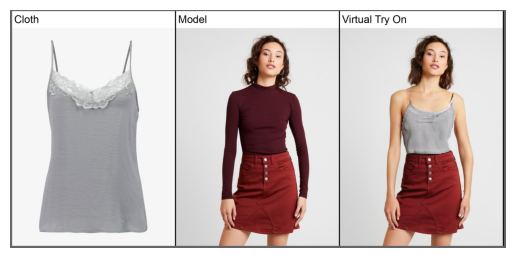

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt



text_pair = os.path.join(root, 'Virtual_Tryon_HRVITON', 'datasets', 'test_pairs.txt')

pairs = []
with open (text_pair, "r") as f:
  for line in f:
    temp = line.split()
    pairs.append(temp)


for pair in pairs:
  line = pair[0].split('_')
  res_name = line[0] + "_" + pair[1]

  res_add = os.path.join(root, 'Virtual_Tryon_HRVITON', 'results/[Atieh_result]', res_name)
  pair.append(res_add)



def show_image(model, cloth, result):
    # Open the images
    image1 = Image.open( os.path.join(root, 'Virtual_Tryon_HRVITON', 'datasets', 'test/cloth', cloth))
    image2 = Image.open( os.path.join(root, 'Virtual_Tryon_HRVITON', 'datasets', 'test/image', model))
    image3 = Image.open(result)

    gap = 5

    # Create a blank image for labels
    label_height = 80  # Height for labels
    label_image1 = Image.new('RGB', (image1.width, label_height), color='white')
    label_image2 = Image.new('RGB', (image2.width, label_height), color='white')
    label_image3 = Image.new('RGB', (image3.width, label_height), color='white')
    draw1 = ImageDraw.Draw(label_image1)
    draw2 = ImageDraw.Draw(label_image2)
    draw3 = ImageDraw.Draw(label_image3)

    # Define labels
    labels = ['Cloth', 'Model', 'Virtual Try On']

    # Define font properties
    default_font = ImageFont.load_default()
    font = ImageFont.truetype("arial.ttf", 50)

    # Draw labels
    draw1.text((10, 10), labels[0], fill='black', font=font)
    draw2.text((10, 10), labels[1], fill='black', font=font)
    draw3.text((10, 10), labels[2], fill='black', font=font)

    # Concatenate the images and labels horizontally
    concatenated_image = Image.new('RGB', (image1.width + image2.width + image3.width + (gap*3), image1.height + label_height))
    concatenated_image.paste(image1, (0, label_height))
    concatenated_image.paste(image2, (image1.width+ gap, label_height))
    concatenated_image.paste(image3, (image1.width + gap +gap + image2.width, label_height))
    concatenated_image.paste(label_image1, (0, 0))
    concatenated_image.paste(label_image2, (image1.width + gap, 0))
    concatenated_image.paste(label_image3, (image1.width + image2.width +gap + gap, 0))

    # Create a new white background image
    white_background = Image.new('RGB', concatenated_image.size, color='white')

    # Paste the concatenated image onto the white background with a gray outline
    outline_color = (100, 100, 100)  # RGB value for gray color
    outline_width = 10
    final_image = Image.new('RGB', (white_background.width + outline_width * 2, white_background.height + outline_width * 2), outline_color)
    final_image.paste(white_background, (outline_width, outline_width))
    final_image.paste(concatenated_image, (outline_width, outline_width))

    # Display the final image
    plt.imshow(final_image)
    plt.axis('off')  # Turn off axis
    plt.show()

for pair in pairs:
  cloth = pair[0]
  model = pair[1]
  result = pair[2]
  show_image(cloth, model, result)
